<a href="https://colab.research.google.com/github/APstats-labs/labs/blob/main/SA_C6%267%268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outliers, distributions, and the Overselling problem

General requirements

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import mahalanobis
from scipy.linalg import inv
from scipy.stats import binom

## Outlier detection

### Univariate

Below is an example of how to detect outliers by defining 'deviance' as any value above or below 1.5 times the IQR.

In [ ]:
# Generate synthetic data
np.random.seed(0)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal data
outliers = np.random.normal(loc=100, scale=5, size=5)  # Outliers
data_with_outliers = np.concatenate([data, outliers])

# Create a DataFrame
df_univariate = pd.DataFrame(data_with_outliers, columns=['Value'])


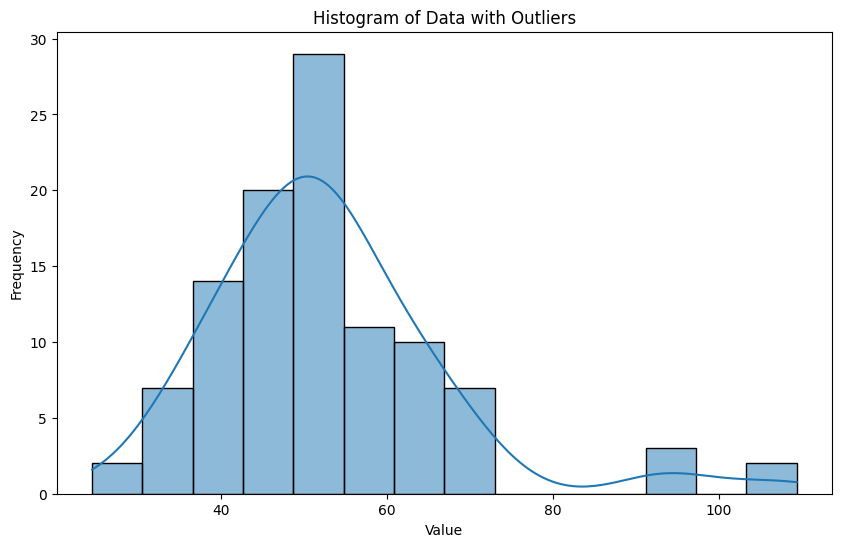

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_univariate['Value'], kde=True)
plt.title('Histogram of Data with Outliers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Here is how we identify outliers:

In [ ]:
# Calculate IQR
Q1 = df_univariate['Value'].quantile(0.25)
Q3 = df_univariate['Value'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df_univariate['Outlier_IQR'] = (df_univariate['Value'] < lower_bound) | (df_univariate['Value'] > upper_bound)

# Display data with outliers
print(df_univariate[df_univariate['Outlier_IQR']])


          Value  Outlier_IQR
100  109.415753         True
101   93.261205         True
102   93.647575         True
103  104.846984         True
104   94.134383         True


Here is how we can visualize these outliers:

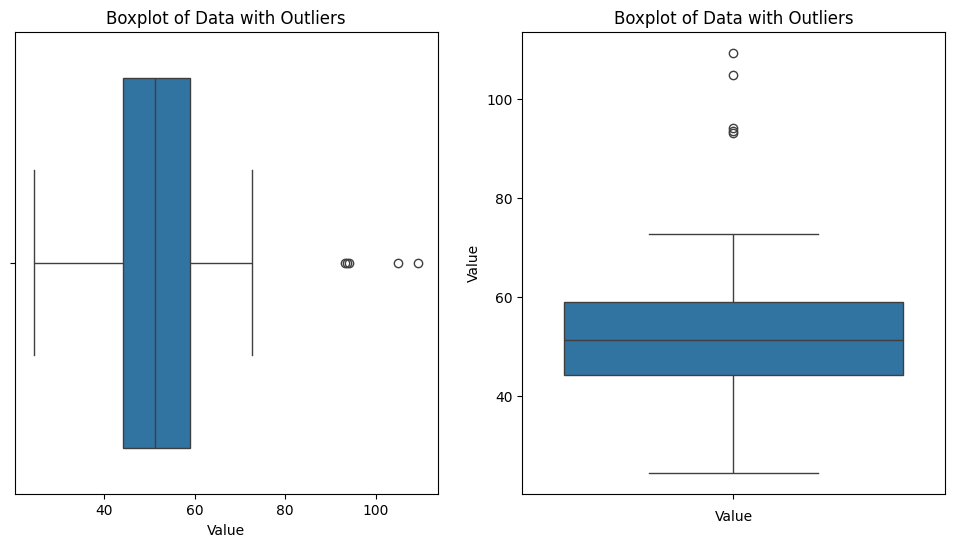

In [ ]:
plt.figure(figsize=(12, 6))


# Plot horizontal boxplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=df_univariate['Value'])
plt.title('Boxplot of Data with Outliers')
plt.xlabel('Value')


# Plot vertical boxplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 1st subplot
sns.boxplot(y=df_univariate['Value'])
plt.title('Boxplot of Data with Outliers')
plt.xlabel('Value')

plt.show()


### Multivariate

In the multivariate case, we can use the Mahalanobis distance.

Check the accepted answer here for more details: https://stats.stackexchange.com/questions/62092/bottom-to-top-explanation-of-the-mahalanobis-distance

In [ ]:
# Set random seed for reproducibility
np.random.seed(43)

# Generate synthetic data with covariance
mean = [0, 0]
covariance = [[2, 1.5], [1.5, 2]]
data = np.random.multivariate_normal(mean, covariance, 100)

# Define outliers
outliers = np.array([
    [1.9, -0.9],  # Outlier 1
])

# Randomly select two indices to replace with outliers
indices_to_replace = np.random.choice(data.shape[0], size=outliers.shape[0], replace=False)

# Replace the selected indices with outliers
data[indices_to_replace] = outliers
data_with_outliers = data

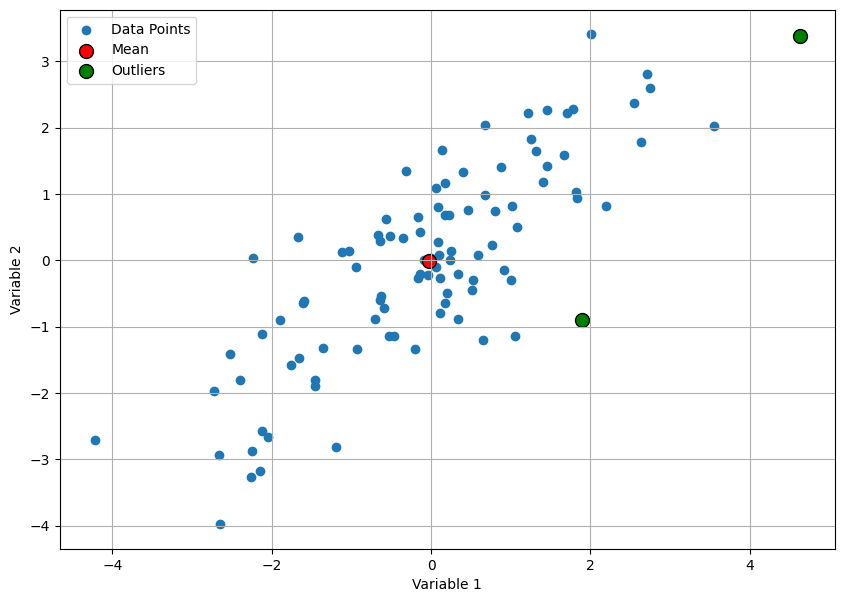

In [ ]:
# Calculate mean and covariance matrix
mean_vec = np.mean(data_with_outliers, axis=0)
cov_matrix = np.cov(data_with_outliers, rowvar=False)

# Inverse of covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Plot scatterplot of the data
plt.figure(figsize=(10, 7))
plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], label='Data Points')

# Highlight the mean values
plt.scatter(mean_vec[0], mean_vec[1], color='red', label='Mean', s=100, edgecolor='k')

# Calculate Mahalanobis distances
distances = []
for point in data_with_outliers:
    dist = mahalanobis(point, mean_vec, inv_cov_matrix)
    distances.append(dist)

distances = np.array(distances)

# Define a Mahalanobis distance threshold
threshold = np.percentile(distances, 98)  # e.g., 90th percentile to identify outliers

# Find points with the specified Mahalanobis distance (same distance from the mean)
highlight_points = data_with_outliers[(distances >= threshold)]

# Highlight these points on the scatterplot
plt.scatter(highlight_points[:, 0], highlight_points[:, 1], color='green', label='Outliers', s=100, edgecolor='k')

# Add labels and legend
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


Data after removing the covariance.

In [ ]:
# Set random seed for reproducibility
np.random.seed(43)

# Generate synthetic data with covariance
mean = [0, 0]
covariance = [[2, 0], [0, 2]]
data = np.random.multivariate_normal(mean, covariance, 100)

# Define outliers
outliers = np.array([
    [1.9, -0.9],  # Outlier 1
])

# Randomly select two indices to replace with outliers
indices_to_replace = np.random.choice(data.shape[0], size=outliers.shape[0], replace=False)

# Replace the selected indices with outliers
data[indices_to_replace] = outliers
data_with_outliers = data

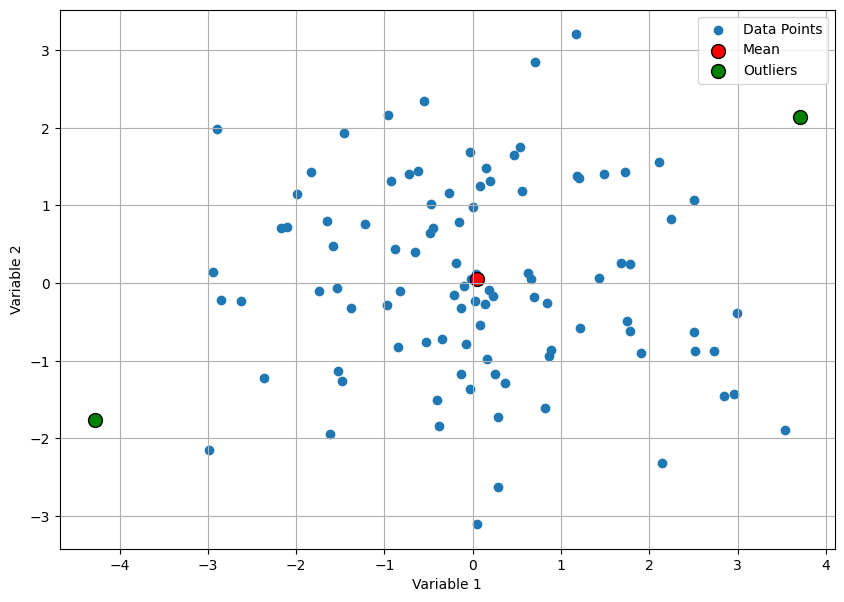

In [ ]:
# Calculate mean and covariance matrix
mean_vec = np.mean(data_with_outliers, axis=0)
cov_matrix = np.cov(data_with_outliers, rowvar=False)

# Inverse of covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Plot scatterplot of the data
plt.figure(figsize=(10, 7))
plt.scatter(data_with_outliers[:, 0], data_with_outliers[:, 1], label='Data Points')

# Highlight the mean values
plt.scatter(mean_vec[0], mean_vec[1], color='red', label='Mean', s=100, edgecolor='k')

# Calculate Mahalanobis distances
distances = []
for point in data_with_outliers:
    dist = mahalanobis(point, mean_vec, inv_cov_matrix)
    distances.append(dist)

distances = np.array(distances)

# Define a Mahalanobis distance threshold
threshold = np.percentile(distances, 98)  # e.g., 90th percentile to identify outliers

# Find points with the specified Mahalanobis distance (same distance from the mean)
highlight_points = data_with_outliers[(distances >= threshold)]

# Highlight these points on the scatterplot
plt.scatter(highlight_points[:, 0], highlight_points[:, 1], color='green', label='Outliers', s=100, edgecolor='k')

# Add labels and legend
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


## Distributions (I)

### Bernoulli Distribution

Imagine tossing a coin and asking what is the % of getting heads.

The resulting distribution of possible outcomes depends on one parameter: the probability of getting heads.

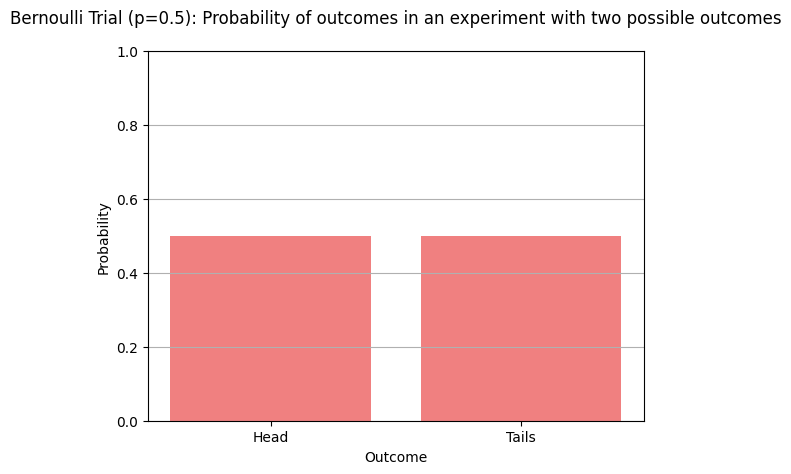

In [ ]:
# Parameters for the Bernoulli distribution
p = 0.5  # Probability of success

# Define the possible outcomes (0 and 1)
x_bernoulli = np.array([0, 1])

# Calculate the probabilities
pmf_bernoulli = binom.pmf(x_bernoulli, n=1, p=p)

# Plot the PMF for the Bernoulli distribution
plt.bar(x_bernoulli, pmf_bernoulli, color='lightcoral', tick_label=['Head', 'Tails'])
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title(f'Bernoulli Trial (p={p}): Probability of outcomes in an experiment with two possible outcomes',pad=20)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


### Binomial Distribution

Imagine tossing a coin repeatedly and asking what is the % of getting x heads.

The resulting distribution of outcomes depends on two parameters: the probability of the outcome (heads) and the number of tosses.

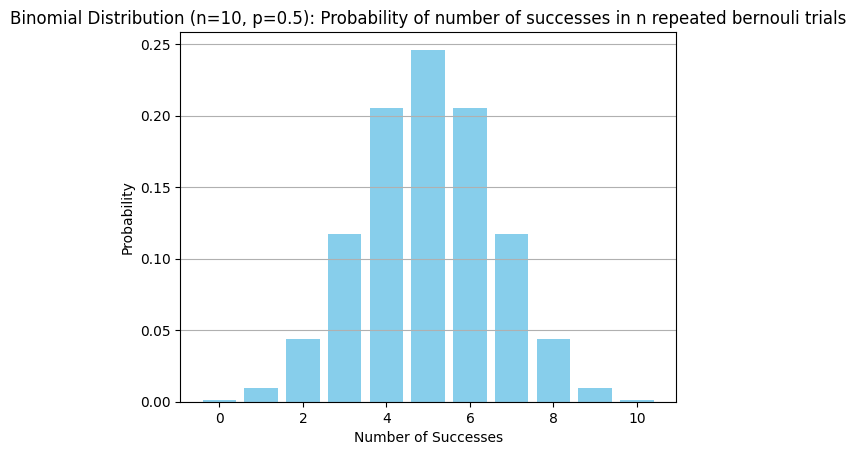

In [ ]:

# Parameters for the binomial distribution
n = 10   # Number of trials
p = 0.5  # Probability of success

# Define the range of outcomes
x = np.arange(0, n + 1) #+1 because np.arrange start stop excludes last

# Calculate the PMF for each outcome
pmf = binom.pmf(x, n, p)

# Plot the PMF
plt.bar(x, pmf, color='skyblue')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n={n}, p={p}): Probability of number of successes in n repeated bernouli trials')
plt.grid(axis='y')
plt.show()


### Using distributions: "The overselling problem"

Airline companies often oversell tickets for flights given that some customers do not show up after buying a ticket. Imagine you are part of the management team in the following scenario:

*   For a flight with 400 seats
*   A ticket costs $100
*   Given past data, the probability of a buyer not showing up is 12%
*   We sell 400 + m tickets.
*   For a flight with 400+m tickets sold, n buyers don't show up
*   If a customer shows up and has no seat, he is refounded 300 dollars




####**How many tickets should we oversell (m)?**

An intuitive answer would be to simply add 12% (of 400 seats) more tickets to each flight (48 tickets) to account for the possible no-show-ups.

However, this does not account for the fact that in some cases, the actual number of no-show-ups will be larger or smaller than 48 (12%).

If we model the no-show-ups as a data-generating process with a bernoulli distribution, we can then compute the probability of actual no-show-ups given that we sell 448 tickets. This will be a binomial distribution.

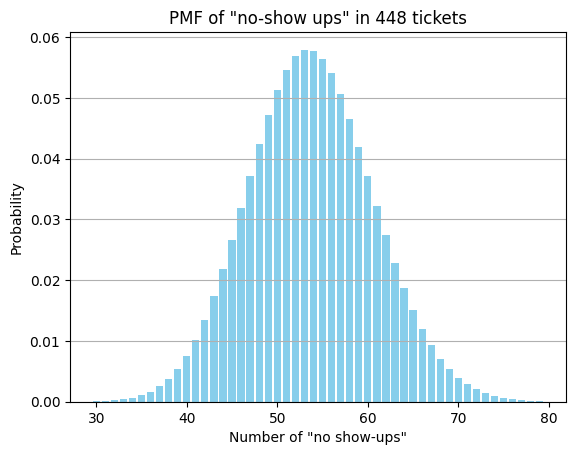

In [ ]:
# Parameters for the binomial distribution
no_tickets = 448   # Number of tickets sold
p_no_showup = 0.12  # Probability of a no show-up
# Define the range of outcomes
range_outcomes = np.arange(30, 80) # a shorter start point was selected as the probabiliy beyond is very small

# Calculate the PMF for each outcome
pmf = binom.pmf(range_outcomes, no_tickets, p_no_showup)

# Plot the PMF
plt.bar(range_outcomes, pmf, color='skyblue')
plt.xlabel('Number of "no show-ups"')
plt.ylabel('Probability')
plt.title('PMF of "no-show ups" in 448 tickets')
plt.grid(axis='y')
plt.show()

Next, we can also compute the potential revenue (after subtracting refunds) for each possible outcome in the distribution.

In [ ]:
# Revenue function
def revenue(m, n):
    base_revenue = 100 * (400 + m)
    if n >= m:
        return base_revenue
    else:
        return base_revenue - 300 * (m - n)

*Explanation of the revenue function*


*For a certain airflight, having actual no-show-ups (n) more or equal than 48 (m) is good. The reasoning is the following: given that we sold 448 tickets (while having only 400 seats) 48 or more "no-show-ups" means 400 "show-ups" and therefore no losses due to the need to refound.*

*47 or less "no-show-ups" is bad. It means that there are more than 400 show-ups and we will have to refound as we only have 400 seats*

*In other words, if n (no showups) >= m (oversold tickets), then we get all the revenue from overselling. However, if m (oversold tickets) < n (no showups), then we substract from the revenue the number of refounds we have to make (given by m-n)*


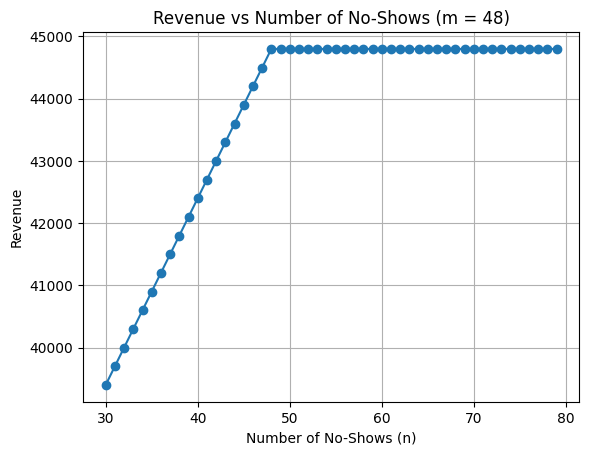

In [ ]:
# Parameters
m = 48  # Number of extra tickets sold (this can be adjusted)
no_show_range = np.arange(30, 80)  # Range of no-shows from 30 to 60

# Compute revenue for each value of no-shows
revenues = [revenue(m, n) for n in no_show_range]

# Plotting the revenue for the range of no-shows
plt.plot(no_show_range, revenues, marker='o')
plt.xlabel('Number of No-Shows (n)')
plt.ylabel('Revenue')
plt.title(f'Revenue vs Number of No-Shows (m = {m})')
plt.grid(True)
plt.show()

Then, we can compute the expected revenue (the revenue obtained if we use this model many times, sum the revenues, and divide by the number of times it is used).

In [ ]:
def expected_revenue(m):
    total_revenue = 0
    num_tickets = 400 + m
    p_no_show = 0.12

    for n in range(num_tickets + 1):
        # Calculate the probability of exactly n no-shows
        prob_n = binom.pmf(n, num_tickets, p_no_show)
        # Calculate the corresponding revenue
        total_revenue += prob_n * revenue(m, n)

    return total_revenue

In [ ]:
expected_revenue(48)

44578.04540060949

Having this, we can therefore compute the expected revenue for other scenarios and notice that we can boost profits.

The optimal value of m is: 52


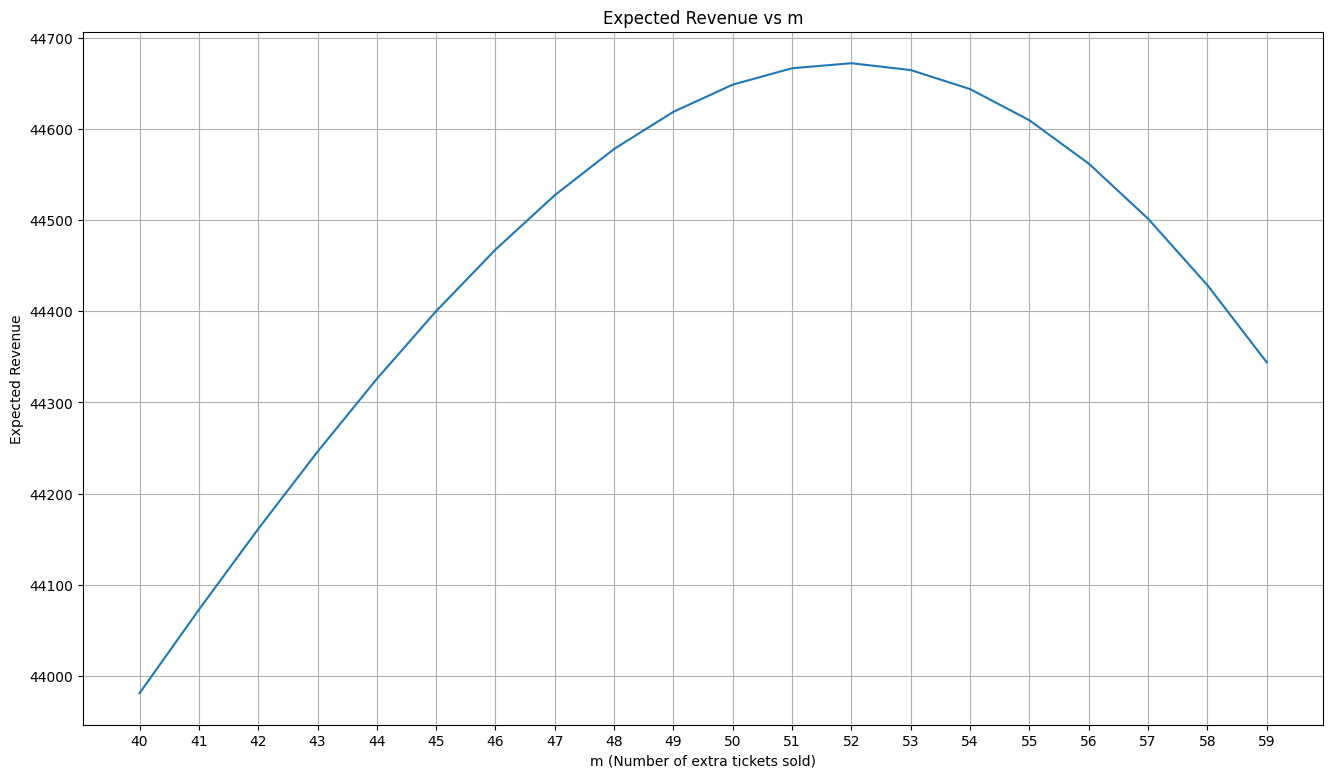

In [ ]:
m_values = range(40,60)  # You can adjust the range of m
revenues = [expected_revenue(m) for m in m_values]

optimal_m = m_values[np.argmax(revenues)]
print(f"The optimal value of m is: {optimal_m}")

# Plot the revenue as a function of m
plt.figure(figsize=(16, 9))
plt.plot(m_values, revenues)
plt.xlabel('m (Number of extra tickets sold)')
plt.ylabel('Expected Revenue')
plt.title('Expected Revenue vs m')
plt.xticks(np.arange(40,60,1))
plt.grid(True)
plt.show()


In [ ]:
expected_revenue(52) - expected_revenue(48)

93.97682256611006

#### **After using the overselling strategy proposed above for five months, a consulting company claims that the probability of buyers not showing up has changed. How should we go about testing this?**

##### **Significance testing**

We decide to take the "extreme event" approach.

We set up a null hypothesis: the no-show-up rate did not change (meaning it is 12%)

We collect data on a number of tickets (say 700)

Then we model the data generating process assuming the null hypothesis to be true. It is a Bernoulli(12%).

Based on this, we can represent the distribution of no show-ups that we could get if we would gather samples similar in all aspects (Read more here about "samples similar in all aspects" https://link.springer.com/article/10.1007/s13194-020-00309-6_). This distirbution is a Binomial (700, 12%). We can call is a distribution of estimations.

Then we look at the n we got from the sample and ask "How rare is this estimation?  In other words,  how close from the tails of the distirbution was it? Or, what was was the probability of observing smaller/bigger or equal than this?

Let us assume two scenarios.

I. out of the 700 tickets that we analyzed, 60 were no-show-ups

II. out of the 700 tickets that we analyed, 100 were no-show-ups.

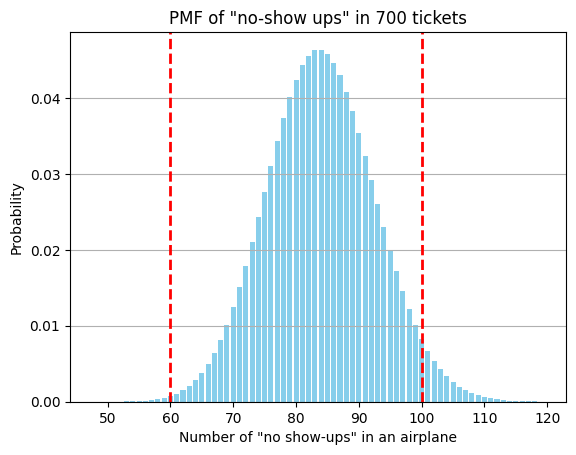

In [ ]:
# Parameters for the binomial distribution
no_tickets = 700   # Number of tickets sold
p_no_showup = 0.12  # Probability of a no show-up (54.24 no show-up)
# Define the range of outcomes
range_outcomes = np.arange(48, 120) # a shorter start point was selected as the probabiliy beyond is very small

# Calculate the PMF for each outcome
pmf = binom.pmf(range_outcomes, no_tickets, p_no_showup)

plt.axvline(x=60, color='red', linestyle='--', linewidth=2, label='x = 60')
plt.axvline(x=100, color='red', linestyle='--', linewidth=2, label='x = 100')

# Plot the PMF
plt.bar(range_outcomes, pmf, color='skyblue')
plt.xlabel('Number of "no show-ups" in an airplane')
plt.ylabel('Probability')
plt.title('PMF of "no-show ups" in 700 tickets')
plt.grid(axis='y')
plt.show()

To understand the extremness of the two scenarios, we have to add all the probabilities from that point to the closest tail. An easier way to do this is by using the CDF.

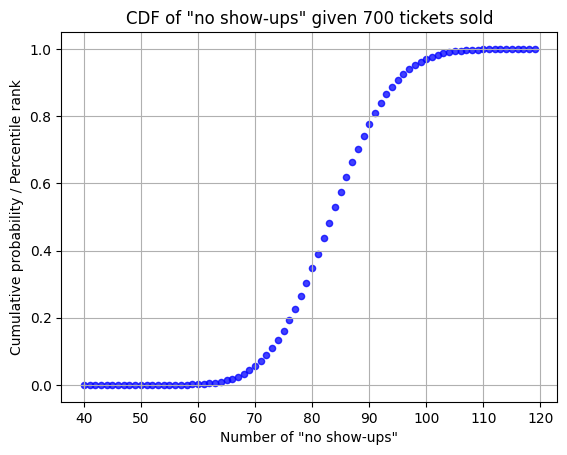

In [ ]:
# Parameters for the binomial distribution
no_tickets_2nd = 700   # Number of tickets sold
p_no_showup = 0.12  # Probability of a no show-up
# Define the range of outcomes
range_outcomes_cdf = np.arange(40, 120) # a shorter start point was selected as the probabiliy beyond is very small
# Calculate the CDF values for each x
cdf= binom.cdf(range_outcomes_cdf, no_tickets_2nd, p_no_showup)

# Plot the CDF
plt.scatter(range_outcomes_cdf, cdf, color='b', s=20, label='CDF', alpha=0.75)
# Set labels and title
plt.xlabel('Number of "no show-ups"')
plt.ylabel('Cumulative probability / Percentile rank')
plt.title('CDF of "no show-ups" given 700 tickets sold')
plt.grid(True)
plt.show()


The CDF shows, for each number of "no-show-ups", the probability of this number or lower happening (it adds all the probabilities untill and including that point)

The "binom.cdf" expression below gives the exact value

In [ ]:
binom.cdf(60, 700, 0.12)

0.0022302327138413692

Notice that for the tail in the right, we have to substract from 1 and use 99 (to include 100)

In [ ]:
1-binom.cdf(99, 700, 0.12)

0.03814423705870729

Given the rarity of the event under the assumed model, we may consider that the process of not showing up did indeed changed. We therefore reject the null hypothesis and propose a new proportion

❗Notice that for this approach to work, the data we have collected must not contain any recognizable sets. We can achieve that by having independent samples. Furthermore, the assumptions of the model must be met (it has to be correctly specified).

❗Notice that this approach involves a conditional inference; that is, we need to repeat the experiment before drawing any definitive conclusions

##### **Hypothesis testing**

Imagine that our previous study or a consultancy firm suggests that the chance of not showing up is actually 31% due to various factors (e.g., early reservations, non-refundable options, and anti-tourism protests around the world).

We decide to take a confirmatory approach.

We set up a main/null hypothesis (H0:p=12%) and an alternative hypothesis (H1:p=31%). We select acceptable levels for Type I error (α) and Power (also called "capability of the test" or 1-β, where β is the Type II error). For example, we decide on a Type I error of 5% and a Power of 80%.

Next, we imagine the distributions of estimations under both hypotheses for varying sample sizes, and we choose the minimum sample size that achieves the desired Power.

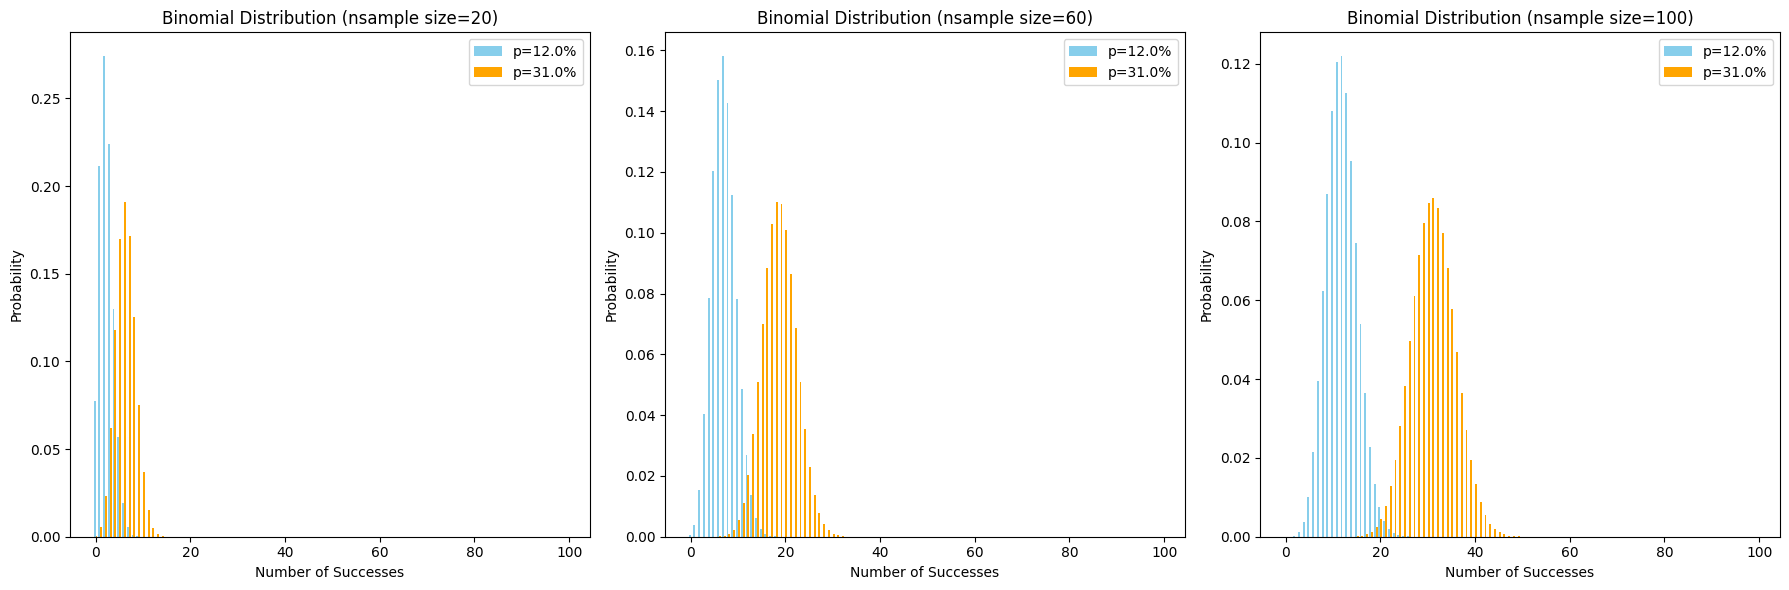

In [ ]:
# Define the function to create the plots
def plot_binomial(n, p1, p2,range_outcomes):

    pmf1 = binom.pmf(range_outcomes, n, p1)
    pmf2 = binom.pmf(range_outcomes, n, p2)

    # Plot both binomial distributions using bars
    plt.bar(range_outcomes - 0.2, pmf1, width=0.4, color='skyblue', label=f'p={p1*100}%', align='center')
    plt.bar(range_outcomes + 0.2, pmf2, width=0.4, color='orange', label=f'p={p2*100}%', align='center')

    # Add labels and title
    plt.xlabel('Number of Successes')
    plt.ylabel('Probability')
    plt.title(f'Binomial Distribution (nsample size={n})')
    plt.legend()

range_outcomes = np.arange(0, 100)
# Create the figure and subplots
plt.figure(figsize=(18, 6))

# First plot for n=20
plt.subplot(1, 3, 1)
plot_binomial(20, 0.12, 0.31,range_outcomes)

# Second plot for n=60
plt.subplot(1, 3, 2)
plot_binomial(60, 0.12, 0.31,range_outcomes)

# Third plot for n=100
plt.subplot(1, 3, 3)
plot_binomial(100, 0.12, 0.31,range_outcomes)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Here is an example of computing alpha and power in the case of sample zize = 60 (graph in the middle)

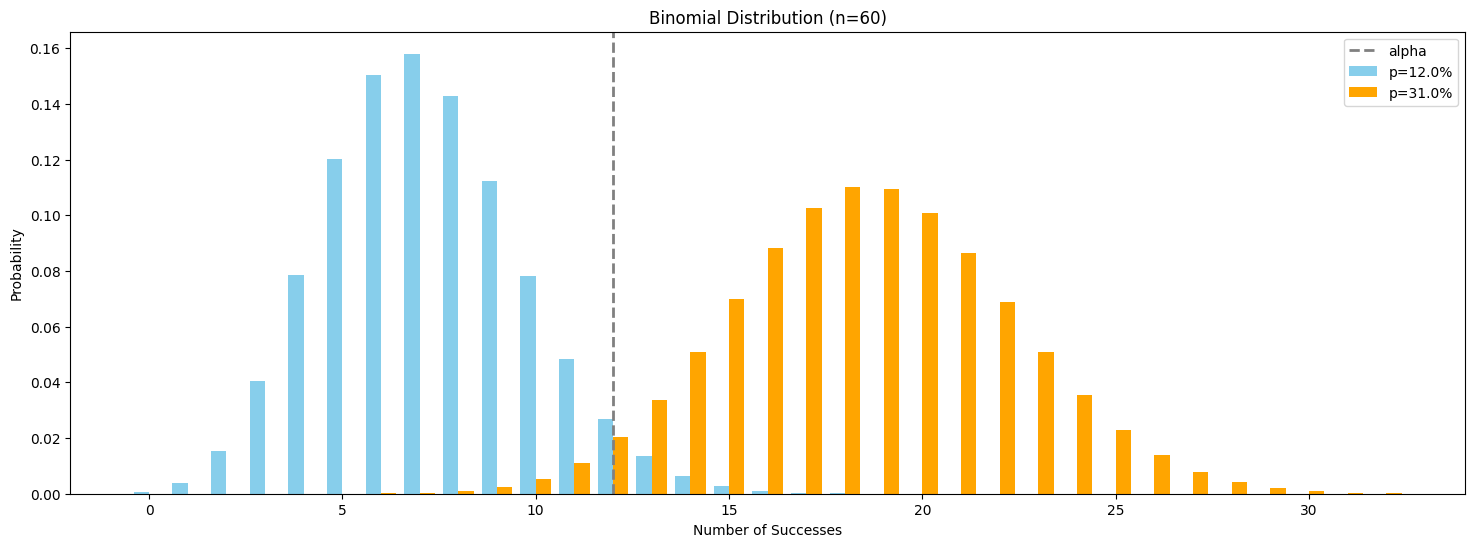

In [ ]:
range_outcomes_60 = np.arange(0, 33)
plt.figure(figsize=(18, 6))
plot_binomial(60, 0.12, 0.31,range_outcomes_60)
plt.axvline(x=binom.ppf(1 - 0.05, 60, 0.12), color='grey', linestyle='--', linewidth=2, label='alpha')
plt.legend()

plt.show()

To compute power and n we have to first identifyi **q alpha.**

**q alpha** is the value (a possible estimation from the distribution of estimations) under/above which we would wrongly reject H0 5% of the times (assuming a repeated sampling scenario).

Looking at the blue distribution, this corresponds to obtaining values to the right of the grey line. (Notice that we assume a one-tailed test, and therefore we look only to the right tail; meaning we lookg only above this value)

The grey line can be determined using the CDF (cumulative distribution function) by identifying the value for which the CDF equals 95%. When we search for a value given a specific CDF, we use the PPF (percent-point function), which is the inverse of the CDF.

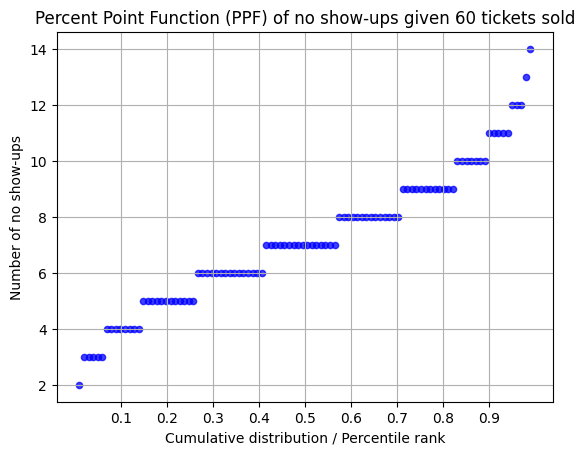

In [ ]:
# Calculate the PPF for the given probabilities
probabilities = np.linspace(0.01, 0.99, 100)
ppf_values = binom.ppf(probabilities, 60, 0.12)

# Plot the PPF
# Plot PPF as a scatter plot
plt.scatter(probabilities, ppf_values, color='b', s=20, label='PPF', alpha=0.75)
plt.xticks(np.arange(0.1, 1.0, 0.1))
plt.xlabel('Cumulative distribution / Percentile rank')
plt.ylabel('Number of no show-ups')
plt.title('Percent Point Function (PPF) of no show-ups given 60 tickets sold')
plt.grid(True)
plt.show()

In [ ]:
binom.ppf(1-0.05, 60, 0.12) #0.05 is the CDF

12.0

Next, we compute the power using the orange distribution.

Power refers 1 - β, where β means the probability of Type II errors.

Type II errors are those estimations in the null/blue distribution that actually come from the alternative/organge distribution. If we would get these estimations we would not reject null/main hypothesis, even though we should (given that they were generated by the alternative distribution).

As such, 1 - β means 1 - the probability of the orange estimations that fall to the left of the grey line.

In other words, it is the orange distribution to the right of the grey line.

To compute it, we make use of the CDF of the alternative distribution

In [ ]:
1-binom.cdf(12, 60, 0.31)

0.9595632232121521

We achieve 95% power, which is above our desired level. Therefore, we can choose a lower sample size.

❗ Next, we simply do what we did in significance testing, except that we have a stopping rule regarding data collection.

❗Here, we do not use any theoretical model regarding how the data was generated. The variation in the sampling distribution is due to the data collection process. Therefore, we have a model of how the data was collected.

❗At the end of this experiment, we can make a definitive decision between
H0 and H1 with a certain risk of error. However, this risk of error applies only in a repeated sampling scenario, that is, only under the exact conditions of the experiment.